<a href="https://colab.research.google.com/github/anujthapamagar/FEDS/blob/main/assignment_Curitiba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
Curitiba = pd.read_csv("dados_A807_H_2019-12-01_2020-08-01_OK.csv",skiprows=9, delimiter=';',parse_dates=["Data Medicao"])

In [3]:
Curitiba.head(10)

,Data Medicao,Hora Medicao,PRECIPITACAO TOTAL. HORARIO(mm),PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA(mB),PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR. AUT(mB),PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB),PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB),RADIACAO GLOBAL(W/m²),TEMPERATURA DA CPU DA ESTACAO(°C),TEMPERATURA DO AR - BULBO SECO. HORARIA(°C),...,TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C),TENSAO DA BATERIA DA ESTACAO(V),UMIDADE REL. MAX. NA HORA ANT. (AUT)(%),UMIDADE REL. MIN. NA HORA ANT. (AUT)(%),UMIDADE RELATIVA DO AR. HORARIA(%),VENTO. DIRECAO HORARIA (gr)(° (gr)),VENTO. RAJADA MAXIMA(m/s),VENTO. VELOCIDADE HORARIA(m/s),Unnamed: 22
0,2019-12-01,0,0.0,909.6,NaN,909.6,908.4,-3.540,23.0,20.6,...,13.2,12.0,12.7,62.0,54.0,61.0,127.0,1.8,0.2,NaN
1,2019-12-01,100,0.0,909.8,1013.521530,909.8,909.4,-3.540,22.0,19.7,...,12.8,12.0,12.6,64.0,57.0,64.0,347.0,3.5,0.9,NaN
2,2019-12-01,200,0.0,909.6,1013.336098,909.9,909.5,-3.540,21.0,19.6,...,13.2,12.4,12.6,66.0,64.0,66.0,23.0,3.5,0.0,NaN
3,2019-12-01,300,0.0,909.4,1013.113289,910.1,909.4,-3.540,20.0,19.6,...,13.2,11.6,12.6,68.0,60.0,60.0,355.0,2.4,0.7,NaN
4,2019-12-01,400,0.0,908.9,1012.893547,909.4,908.9,-3.540,20.0,18.7,...,12.0,11.5,12.6,65.0,59.0,65.0,121.0,1.6,0.0,NaN
5,2019-12-01,500,0.0,907.9,1011.854296,908.9,907.9,-3.540,19.0,18.5,...,13.2,12.0,12.6,71.0,65.0,71.0,54.0,1.0,0.0,NaN
6,2019-12-01,600,0.0,907.9,1011.816700,907.9,907.5,-3.532,19.0,18.6,...,13.1,12.4,12.6,71.0,67.0,67.0,71.0,1.9,0.0,NaN
7,2019-12-01,700,0.0,908.3,1012.715645,908.4,907.9,-3.540,19.0,17.4,...,12.9,12.1,12.6,75.0,67.0,75.0,73.0,1.4,0.2,NaN
8,2019-12-01,800,0.0,908.6,1012.936435,908.8,908.3,53.513,18.0,17.7,...,13.2,12.5,12.6,79.0,73.0,73.0,69.0,1.3,0.0,NaN
9,2019-12-01,900,0.0,909.5,1012.704015,909.5,908.6,601.686,19.0,21.0,...,13.6,12.2,12.8,73.0,61.0,61.0,273.0,1.5,0.1,NaN


In [4]:
Curitiba.columns

Index(['Data Medicao', 'Hora Medicao', 'PRECIPITACAO TOTAL. HORARIO(mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO. HORARIA(mB)',
       'PRESSAO ATMOSFERICA REDUZIDA NIVEL DO MAR. AUT(mB)',
       'PRESSAO ATMOSFERICA MAX.NA HORA ANT. (AUT)(mB)',
       'PRESSAO ATMOSFERICA MIN. NA HORA ANT. (AUT)(mB)',
       'RADIACAO GLOBAL(W/m²)', 'TEMPERATURA DA CPU DA ESTACAO(°C)',
       'TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)',
       'TEMPERATURA DO PONTO DE ORVALHO(°C)',
       'TEMPERATURA MAXIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA MINIMA NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT)(°C)',
       'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT)(°C)',
       'TENSAO DA BATERIA DA ESTACAO(V)',
       'UMIDADE REL. MAX. NA HORA ANT. (AUT)(%)',
       'UMIDADE REL. MIN. NA HORA ANT. (AUT)(%)',
       'UMIDADE RELATIVA DO AR. HORARIA(%)',
       'VENTO. DIRECAO HORARIA (gr)(° (gr))', 'VENTO. RAJADA MAXIMA(m/s)',
       'VENTO. VELOCIDADE HORARIA(m/

In [5]:
data = Curitiba[['Data Medicao', 'TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)']]
data.head()

,Data Medicao,TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)
0,2019-12-01,20.6
1,2019-12-01,19.7
2,2019-12-01,19.6
3,2019-12-01,19.6
4,2019-12-01,18.7


In [6]:
data = data.rename(columns={'Data Medicao': 'date', 'TEMPERATURA DO AR - BULBO SECO. HORARIA(°C)': 'Temperature'})
data.head()

,date,Temperature
0,2019-12-01,20.6
1,2019-12-01,19.7
2,2019-12-01,19.6
3,2019-12-01,19.6
4,2019-12-01,18.7


In [7]:
data.tail(3)

,date,Temperature
5877,2020-08-01,15.7
5878,2020-08-01,14.2
5879,2020-08-01,13.2


In [8]:
df = data.resample('D',on='date')['Temperature'].mean().to_frame()
df.head()

,Temperature
date,
2019-12-01,21.937500
2019-12-02,16.708333
2019-12-03,16.687500
2019-12-04,17.679167
2019-12-05,20.279167


In [11]:
df['DoY']=df.index.dayofyear
df.head(3)

,Temperature,DoY
date,,
2019-12-01,21.937500,335
2019-12-02,16.708333,336
2019-12-03,16.687500,337


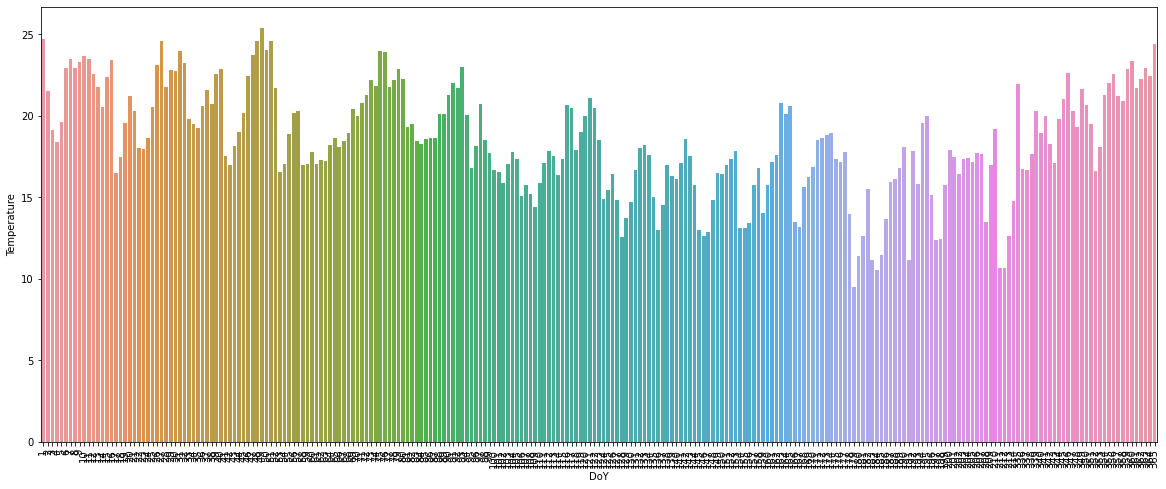

In [16]:
plt.figure(figsize=(20,8))
sns.barplot(x="DoY", y="Temperature", data=df)
plt.xticks(rotation=90)
plt.show();